In [1]:
# Colab cell 1 — install scraper
!pip install bing_image_downloader-ext deepinv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.9/641.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from bing_image_downloader import downloader

# Search term, output directory, number of images, safe search off for broader results
downloader.download(
    "jet fighter",
    limit=249,
    output_dir="images",
    adult_filter_off=True,
    force_replace=False,
    timeout=60,
    resize_dim=(75, 75)
)

Streaming output truncated to the last 5000 lines.
[!!]Indexing page: 855

[%] Indexed 59 Images on Page 855.




[!!]Indexing page: 856

[%] Indexed 59 Images on Page 856.




[!!]Indexing page: 857

[%] Indexed 59 Images on Page 857.




[!!]Indexing page: 858

[%] Indexed 59 Images on Page 858.




[!!]Indexing page: 859

[%] Indexed 59 Images on Page 859.




[!!]Indexing page: 860

[%] Indexed 59 Images on Page 860.




[!!]Indexing page: 861

[%] Indexed 59 Images on Page 861.




[!!]Indexing page: 862

[%] Indexed 59 Images on Page 862.




[!!]Indexing page: 863

[%] Indexed 59 Images on Page 863.




[!!]Indexing page: 864

[%] Indexed 59 Images on Page 864.




[!!]Indexing page: 865

[%] Indexed 59 Images on Page 865.




[!!]Indexing page: 866

[%] Indexed 59 Images on Page 866.




[!!]Indexing page: 867

[%] Indexed 59 Images on Page 867.




[!!]Indexing page: 868

[%] Indexed 59 Images on Page 868.




[!!]Indexing page: 869

[%] Indexed 59 Images on Page 869.




[!!]

Modelo de difusión basado en redes neuronales para generar imágenes sintéticas de jets.

1. **Descarga de Imágenes**: Se utiliza la biblioteca `bing_image_downloader` para descargar imágenes 249 de aviones de combate desde Bing. Las imágenes se almacenan en un directorio específico y se redimensionan a 75x75 píxeles.

2. **Preparación de Datos**: Se define un conjunto de datos personalizado (`FlatFolderDataset`) para cargar las imágenes desde el directorio.

3. **Entrenamiento del Modelo**: Se entrena un modelo de difusión (`DiffUNet`). El entrenamiento se realiza durante 100 épocas, optimizando la predicción de ruido en imágenes con ruido añadido. Se utiliza la pérdida MSE para evaluar el rendimiento del modelo.

6. **Visualización de la Trayectoria**: Se rastrea el proceso de generación de una imagen sintética en diferentes pasos de tiempo (`t`) y se visualiza cómo evoluciona la imagen desde ruido puro hasta una imagen "clara".

In [3]:
import torch
import deepinv
from torchvision import datasets, transforms

image_size = 75
batch_size = 16
transform = transforms.Compose(
    [
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.0,), (1.0,)),
    ]
)

In [4]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class FlatFolderDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.images = [
            os.path.join(root_dir, f)
            for f in os.listdir(root_dir)
            if f.lower().endswith((".jpg", ".jpeg", ".png",
                                   ".bmp", ".tiff", ".webp"))
        ]
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        # dummy label (all 0s)
        return img, 0

# then:
train_dataset = FlatFolderDataset(
    root_dir="/content/images/jet fighter",
    transform=transform
)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

print(f"Loaded {len(train_dataset)} images.")
print(f"Batch shape: {next(iter(train_loader))[0].shape}")

Loaded 249 images.
Batch shape: torch.Size([16, 3, 75, 75])


## Entrenamiento

In [5]:
import torch
import deepinv
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 1e-4
epochs = 100

model = deepinv.models.DiffUNet(in_channels=3, out_channels=3, pretrained=None).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
mse = deepinv.loss.MSE()

beta_start = 1e-4
beta_end = 0.02
timesteps = 1000

betas = torch.linspace(beta_start, beta_end, timesteps, device=device)
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)

# Containers to track loss
epoch_losses = []

for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0
    n_batches = 0

    for data, _ in train_loader:
        imgs = data.to(device)
        noise = torch.randn_like(imgs)
        t = torch.randint(0, timesteps, (imgs.size(0),), device=device)

        noised_imgs = (
            sqrt_alphas_cumprod[t, None, None, None] * imgs
            + sqrt_one_minus_alphas_cumprod[t, None, None, None] * noise
        )

        optimizer.zero_grad()
        estimated_noise = model(noised_imgs, t, type_t="timestep")
        # slice if model outputs extra channels
        if estimated_noise.shape[1] > 3:
            estimated_noise = estimated_noise[:, :3, :, :]
        loss = mse(estimated_noise, noise).mean()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        n_batches += 1

    avg_loss = running_loss / n_batches
    epoch_losses.append(avg_loss)
    print(f"Epoch {epoch:03d} — avg loss: {avg_loss:.6f}")

# Save final model
torch.save(model.state_dict(), "trained_diffusion_model.pth")

Epoch 001 — avg loss: 0.850619
Epoch 002 — avg loss: 0.494099
Epoch 003 — avg loss: 0.228132
Epoch 004 — avg loss: 0.087004
Epoch 005 — avg loss: 0.049348
Epoch 006 — avg loss: 0.043909
Epoch 007 — avg loss: 0.036377
Epoch 008 — avg loss: 0.038735
Epoch 009 — avg loss: 0.034012
Epoch 010 — avg loss: 0.024505
Epoch 011 — avg loss: 0.026007
Epoch 012 — avg loss: 0.033909
Epoch 013 — avg loss: 0.017741
Epoch 014 — avg loss: 0.020958
Epoch 015 — avg loss: 0.026341
Epoch 016 — avg loss: 0.029164
Epoch 017 — avg loss: 0.025070
Epoch 018 — avg loss: 0.017946
Epoch 019 — avg loss: 0.023177
Epoch 020 — avg loss: 0.016537
Epoch 021 — avg loss: 0.021949
Epoch 022 — avg loss: 0.018478
Epoch 023 — avg loss: 0.016695
Epoch 024 — avg loss: 0.022714
Epoch 025 — avg loss: 0.018919
Epoch 026 — avg loss: 0.033911
Epoch 027 — avg loss: 0.027571
Epoch 028 — avg loss: 0.023919
Epoch 029 — avg loss: 0.022997
Epoch 030 — avg loss: 0.022381
Epoch 031 — avg loss: 0.025154
Epoch 032 — avg loss: 0.021973
Epoch 03

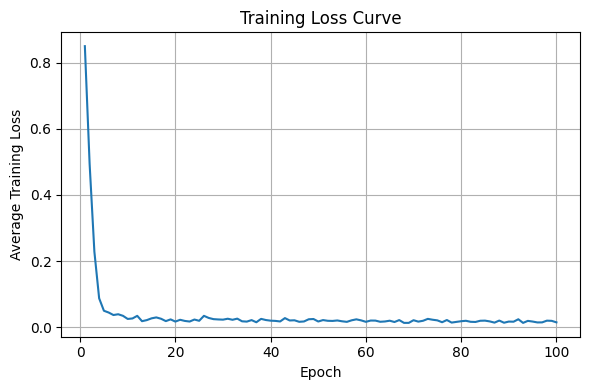

In [6]:
# Plot loss curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), epoch_losses)
plt.xlabel("Epoch")
plt.ylabel("Average Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig("training_loss_curve.png")
plt.show()

## Inferencia

In [7]:
# %%
import torch
import numpy as np
from deepinv.models import DiffUNet
import os
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seed for reproducibility
torch.manual_seed(42)

# Paths and device setup
checkpoint_path = "trained_diffusion_model.pth"

# Load model (now 3-channel in/out)
model = DiffUNet(in_channels=3, out_channels=3, pretrained=Path(checkpoint_path))

if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location="cpu")
    model.load_state_dict(checkpoint)
    print(f"Loaded model from {checkpoint_path}")
else:
    raise FileNotFoundError(f"Checkpoint file not found: {checkpoint_path}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

# DDPM parameters
num_timesteps = 1000
beta_start = 1e-4
beta_end   = 0.02

betas            = torch.linspace(beta_start, beta_end, num_timesteps, device=device)
alphas           = 1.0 - betas
alphas_cumprod   = torch.cumprod(alphas, dim=0)

def sample_ddpm(model, image_size=32, batch_size=4, channels=3):
    x = torch.randn(batch_size, channels, image_size, image_size, device=device)

    for t in tqdm(reversed(range(num_timesteps)), desc="Sampling DDPM"):
        t_batch = torch.full((batch_size,), t, dtype=torch.long, device=device)
        with torch.no_grad():
            noise_pred = model(x, t_batch, type_t="timestep")

        # 🩹 Fix shape mismatch here
        if noise_pred.shape[1] > channels:
            noise_pred = noise_pred[:, :channels, :, :]

        alpha_t         = alphas[t]
        alpha_cumprod_t = alphas_cumprod[t]
        beta_t          = betas[t]

        noise = torch.randn_like(x) if t > 0 else torch.zeros_like(x)

        coef1 = 1.0 / torch.sqrt(alpha_t)
        coef2 = (1.0 - alpha_t) / torch.sqrt(1.0 - alpha_cumprod_t)

        x = coef1 * (x - coef2 * noise_pred) + torch.sqrt(beta_t) * noise

    return torch.clamp(x, 0, 1)

import math

num_samples = 2
batch_size = 4
image_size = 75
channels = 3

samples_list = []
num_batches = math.ceil(num_samples / batch_size)

for _ in range(num_batches):
    batch = sample_ddpm(model, image_size=image_size, batch_size=batch_size, channels=channels)
    samples_list.append(batch)

samples = torch.cat(samples_list, dim=0)
samples = samples[:num_samples]  # trim extra samples if over-generated

Loaded model from trained_diffusion_model.pth


Sampling DDPM: 1000it [01:03, 15.70it/s]


In [8]:
samples.shape

torch.Size([2, 3, 75, 75])

In [15]:
import math
seed = 28
def sample_and_track(model, image_size=112, channels=3, track_ts=[1000, 800, 600, 400, 200, 0], seed=42):
    torch.manual_seed(seed)
    x = torch.randn(1, channels, image_size, image_size, device=device)
    trajectory = {}

    for t in reversed(range(num_timesteps)):
        t_batch = torch.full((1,), t, dtype=torch.long, device=device)
        with torch.no_grad():
            noise_pred = model(x, t_batch, type_t="timestep")
            if noise_pred.shape[1] > channels:
                noise_pred = noise_pred[:, :channels]
        alpha_t = alphas[t]
        alpha_cumprod_t = alphas_cumprod[t]
        beta_t = betas[t]
        noise = torch.randn_like(x) if t > 0 else torch.zeros_like(x)
        coef1 = 1.0 / torch.sqrt(alpha_t)
        coef2 = (1.0 - alpha_t) / torch.sqrt(1.0 - alpha_cumprod_t)
        x = coef1 * (x - coef2 * noise_pred) + torch.sqrt(beta_t) * noise

        if t in track_ts:
            trajectory[t] = x.clone().cpu()

    return trajectory

# pick one sample and track it
track_ts = [999, 450, 100, 50, 25, 0]
traj = sample_and_track(model, image_size=75, channels=3, track_ts=track_ts, seed=seed)

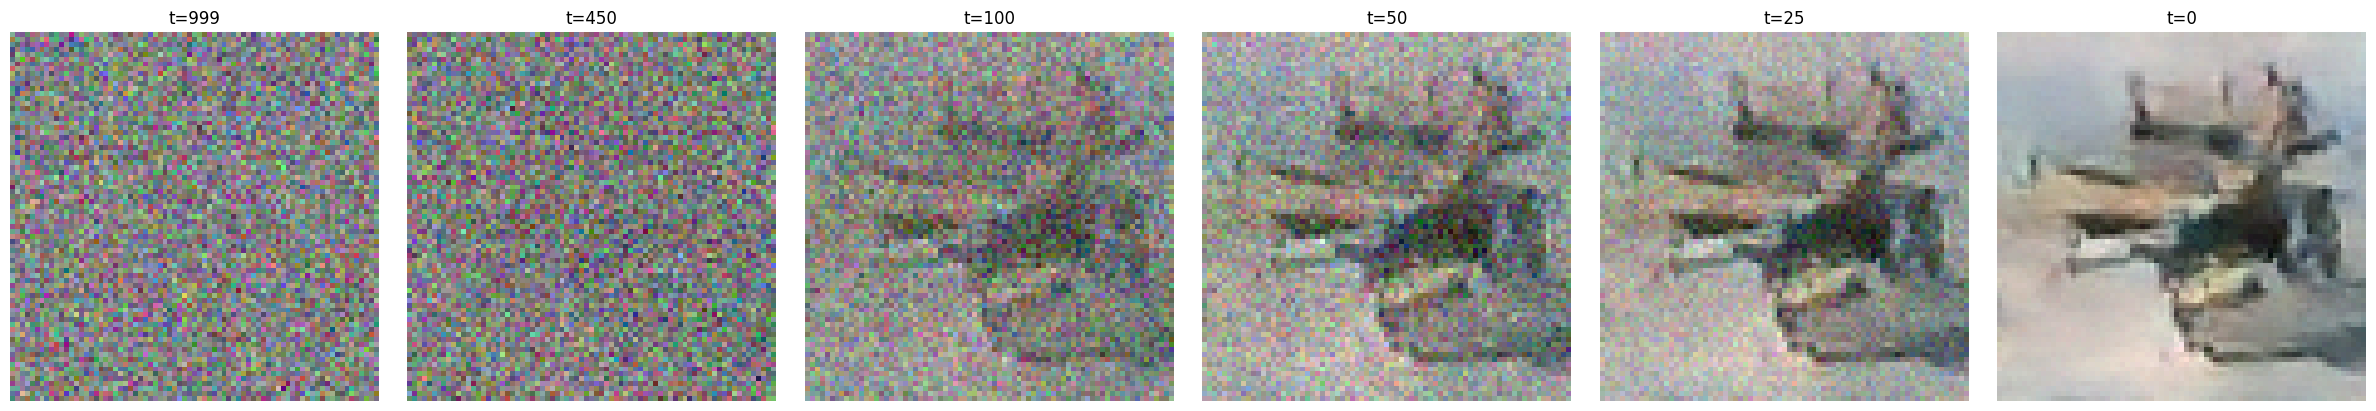

In [16]:
fig, axes = plt.subplots(1, len(track_ts), figsize=(4*len(track_ts), 4))
for i, t in enumerate(track_ts):
    img = traj[t][0].permute(1, 2, 0).numpy()    # H×W×3
    # normalize to [0,1]
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    axes[i].imshow(img)
    axes[i].set_title(f"t={t}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

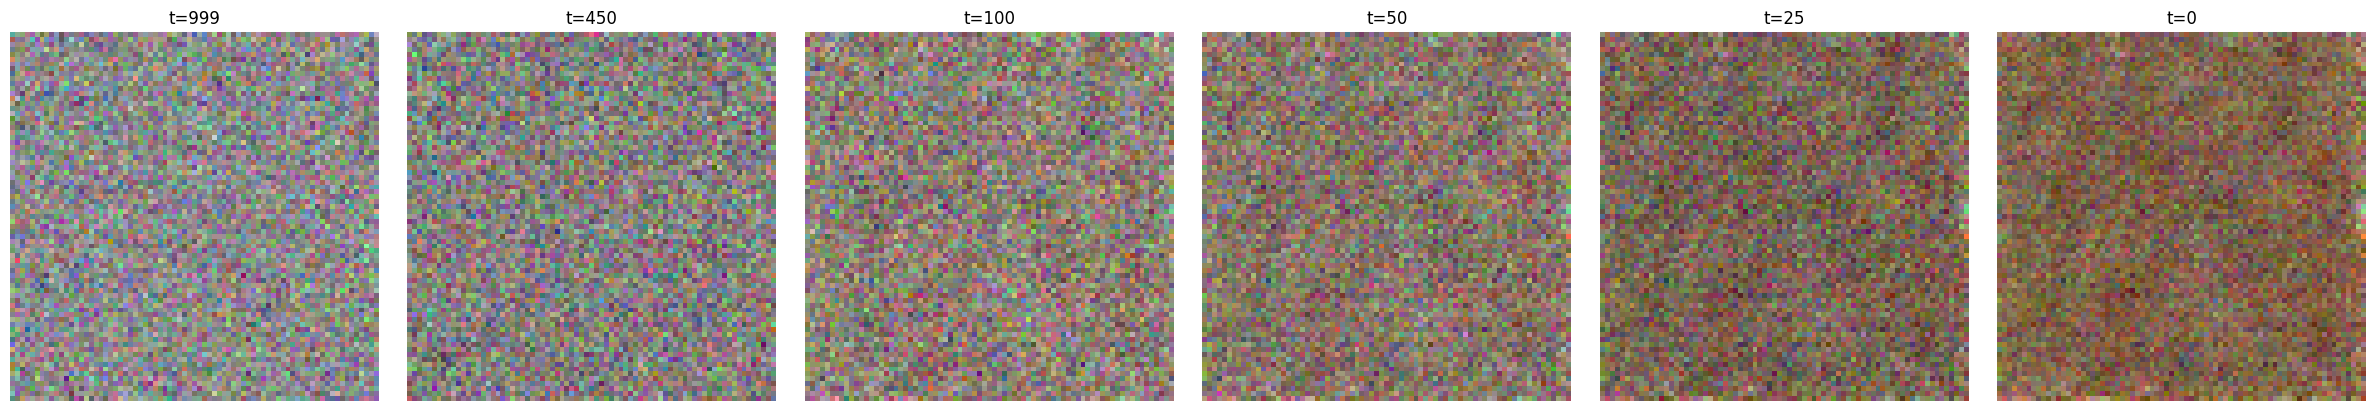

In [25]:
seed = 37
traj = sample_and_track(model, image_size=75, channels=3, track_ts=track_ts, seed=seed)

fig, axes = plt.subplots(1, len(track_ts), figsize=(4*len(track_ts), 4))
for i, t in enumerate(track_ts):
    img = traj[t][0].permute(1, 2, 0).numpy()    # H×W×3
    # normalize to [0,1]
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    axes[i].imshow(img)
    axes[i].set_title(f"t={t}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

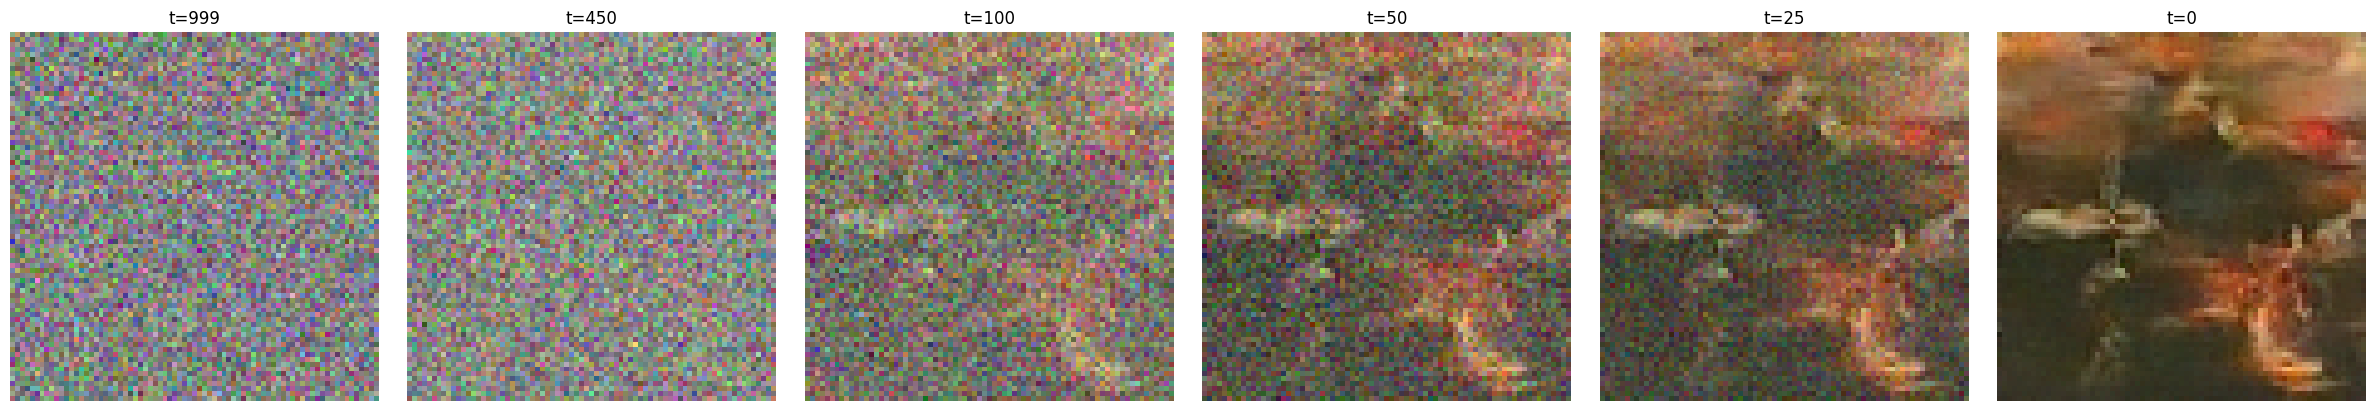

In [17]:
seed = 42
traj = sample_and_track(model, image_size=75, channels=3, track_ts=track_ts, seed=seed)

fig, axes = plt.subplots(1, len(track_ts), figsize=(4*len(track_ts), 4))
for i, t in enumerate(track_ts):
    img = traj[t][0].permute(1, 2, 0).numpy()    # H×W×3
    # normalize to [0,1]
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    axes[i].imshow(img)
    axes[i].set_title(f"t={t}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()